In [4]:
from pymongo import MongoClient
import pandas as pd
from bson.objectid import ObjectId
import warnings
warnings.simplefilter('ignore')

client = MongoClient()
db = client.seasalt
collection = db.shopee

In [6]:
test = collection.find( {"seller_name": "mobilesquare" }, {"product_brand": 1, "product_name": 1, "product_breadcrumb": 1})
data = []
for x in test:
    data.append(x)
len(data)

23

In [7]:
for i in range(10):
    print(data[i]['product_brand'])

Apple
Apple
Huawei
Samsung
Huawei
Samsung

LG




In [11]:
data[10]['product_breadcrumb']

['Shopee', 'Mobile & Gadgets', 'Mobile Phones & Tablets', 'Others']

In [12]:
test = collection.find( {"product_breadcrumb": 'Mobile Phones & Tablets' }, {"product_brand": 1, "product_name": 1, 'sold_monthly': 1, 'current_price': 1})
data = []
for x in test:
    data.append(x)
len(data)

3247

In [13]:
data[:5]

[{'_id': ObjectId('5aa5661ff9a8fa505180de2c'),
  'current_price': '69.00',
  'product_brand': '0',
  'product_name': 'Portable WIFI 7 Inch Android Kids Tablet dual camera Bluetooth Quad Core tab[KS]',
  'sold_monthly': '0'},
 {'_id': ObjectId('5aa56626f9a8fa505180de33'),
  'current_price': '102.00',
  'product_brand': 'Amazon',
  'product_name': 'GeekBite Amazon Kindle 8th Gen + 8000 Ebooks+ Screen Protector+ Kindle Pouch',
  'sold_monthly': '27'},
 {'_id': ObjectId('5aa56633f9a8fa505180de4c'),
  'current_price': '109.00',
  'product_brand': 'Amazon',
  'product_name': 'Amazon Kindle 8th Gen 2016 (USA/Special Offers) - White/BLACK',
  'sold_monthly': '0'},
 {'_id': ObjectId('5aa5668df9a8fa505180ded2'),
  'current_price': '185.00',
  'product_brand': 'Xiaomi',
  'product_name': 'Xiaomi Redmi Note 4 3+64GB',
  'sold_monthly': '4'},
 {'_id': ObjectId('5aa566b5f9a8fa505180df0f'),
  'current_price': '139.00',
  'product_brand': 'Microsoft',
  'product_name': 'Uag Plasma For Microsoft Surfac

In [17]:
price = []
brand = []
name = []
sold = []

for i in range(len(data)):
    price.append(data[i]['current_price'])
    brand.append(data[i]['product_brand'])
    name.append(data[i]['product_name'])
    sold.append(data[i]['sold_monthly'])
    
df = pd.DataFrame({
    'name': name,
    'brand': brand,
    'price': price,
    'sold': sold
})    

print(df.shape)
df.head()

(3247, 4)


,brand,name,price,sold
0,0,Portable WIFI 7 Inch Android Kids Tablet dual ...,69.00,0
1,Amazon,GeekBite Amazon Kindle 8th Gen + 8000 Ebooks+ ...,102.00,27
2,Amazon,Amazon Kindle 8th Gen 2016 (USA/Special Offers...,109.00,0
3,Xiaomi,Xiaomi Redmi Note 4 3+64GB,185.00,4
4,Microsoft,Uag Plasma For Microsoft Surface Pro 2017 / Su...,139.00,0


In [18]:
df.brand.value_counts().head()

           2138
Samsung     206
0           206
Xiaomi      181
Apple       155
Name: brand, dtype: int64

In [21]:
df = df[(df.brand != "") & (df.brand != "0")]
df.brand.value_counts().head()

Samsung     206
Xiaomi      181
Apple       155
No Brand    117
Huawei       84
Name: brand, dtype: int64

In [22]:
df.shape

(903, 4)

In [23]:
df = df[df.sold != "0"]
df.shape

(69, 4)

In [26]:
df.brand.value_counts()

Samsung     23
Xiaomi      11
Apple       11
Huawei       7
No Brand     7
OEM          2
Lenovo       2
iNo          1
Nokia        1
sghitech     1
Google       1
Acer         1
Amazon       1
Name: brand, dtype: int64

In [34]:
df['price'][:20]

1               102.00
3               185.00
5               800.00
9               665.00
18              740.00
26     168.00 - 228.00
29              248.00
30              128.00
52              365.00
126            1320.00
147              65.00
262        7.17 - 9.87
355             319.00
499    235.00 - 372.50
528            2120.00
600            1170.00
607             480.00
642            1088.00
667             329.00
687    1500.00-1520.00
Name: price, dtype: object

In [36]:
price = [x.split("-")[0].strip() for x in df['price'].tolist()]

In [37]:
price[:20]

['102.00',
 '185.00',
 '800.00',
 '665.00',
 '740.00',
 '168.00',
 '248.00',
 '128.00',
 '365.00',
 '1320.00',
 '65.00',
 '7.17',
 '319.00',
 '235.00',
 '2120.00',
 '1170.00',
 '480.00',
 '1088.00',
 '329.00',
 '1500.00']

In [42]:
df['price'] = price
df['price'] = pd.to_numeric(df['price'])
df['sold'] = df['sold'].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 1 to 1357
Data columns (total 4 columns):
brand    69 non-null object
name     69 non-null object
price    69 non-null float64
sold     69 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ KB


In [41]:
df.shape

(69, 4)

In [43]:
df['sales'] = df['price'] * df['sold']
df.head()

,brand,name,price,sold,sales
1,Amazon,GeekBite Amazon Kindle 8th Gen + 8000 Ebooks+ ...,102.0,27,2754.0
3,Xiaomi,Xiaomi Redmi Note 4 3+64GB,185.0,4,740.0
5,Huawei,Huawei Mate 10 Pro *2 Years SG Warranty,800.0,1,800.0
9,Nokia,Nokia 8 64GB/4GB - 1 Year SG Warranty,665.0,3,1995.0
18,Huawei,Huawei Mate 10 64GB | 2 Years SG Warranty,740.0,1,740.0


In [54]:
pp = df.groupby('brand')['sales'].sum().sort_values(ascending = False)
pp

brand
Apple       102485.17
Samsung      76418.00
Huawei       19562.00
No Brand     16898.49
Xiaomi        7669.00
OEM           4713.00
Google        4680.00
Amazon        2754.00
Nokia         1995.00
Lenovo         974.00
Acer           744.00
sghitech       256.00
iNo             65.00
Name: sales, dtype: float64

In [57]:
pp.index.tolist()[:5]

['Apple', 'Samsung', 'Huawei', 'No Brand', 'Xiaomi', 'OEM', 'Google']

In [59]:
pp.values.tolist()[:5]

[102485.17, 76418.0, 19562.0, 16898.489999999998, 7669.0, 4713.0, 4680.0]

In [66]:
others = sum(pp.values.tolist()[5:])

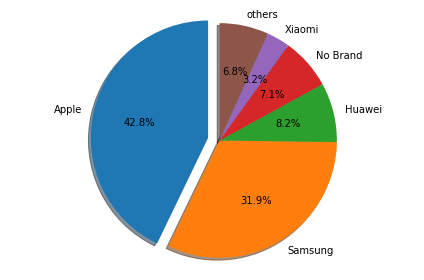

In [67]:
import matplotlib.pyplot as plt

labels = pp.index.tolist()[:5] + ['others']
# sizes = [215, 130, 245, 210]
sizes = pp.values.tolist()[:5] + [others]
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()    